In [77]:
import numpy as np
import matplotlib.pyplot as plt
import rab_with_db as rwd 

# Сколько игр у каждого игрока. Гистограмма

In [7]:
game_for_player = []
player_table = rwd.table_list("Player")
for i in player_table:
    players_kifu_list = rwd.players_kifu_list(i[0],False)
    game_for_player.append(len(players_kifu_list))
    players_kifu_list = list(map(lambda x:x[1],players_kifu_list))

No handles with labels found to put in legend.


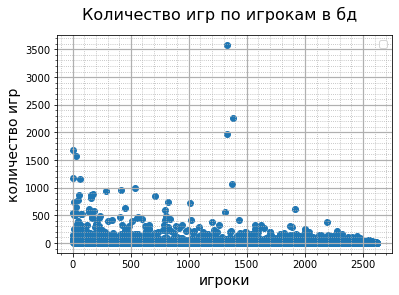

In [5]:
fig, ax = plt.subplots()
fig.suptitle("Количество игр по игрокам в бд", fontsize=16)
ax.set_xlabel("игроки", fontsize=14)
ax.set_ylabel("количество игр", fontsize=14)
ax.minorticks_on()
ax.grid(which="major",linewidth=1.2)
ax.grid(which="minor",linestyle = ':')
ax.scatter(range(len(game_for_player)),game_for_player)
plt.show()

In [8]:
print("больше 100", sum(map(lambda x: x>100,game_for_player)), "шт.")
print("больше 200", sum(map(lambda x: x>200,game_for_player)), "шт.")
print("больше 500", sum(map(lambda x: x>500,game_for_player)), "шт.")

больше 100 238 шт.
больше 200 112 шт.
больше 500 33 шт.


# сколько игр между собой у пары из двух игроков

In [106]:
pdict = {}
part = rwd.table_list("Participation")
stack = [(0,0,0)]
for p in part:
    pid,pid_p,pid_k = p
    last_pop = stack.pop()
    if last_pop[-1] == pid_k:
        a = min(last_pop[1],pid_p)
        b = max(last_pop[1],pid_p)
        if (a,b) in pdict.keys():
            pdict[(a,b)] += 1
        else:
            pdict[(a,b)] = 1
    else:
        stack.append(last_pop)
        stack.append(p)
# print(pdict)

In [103]:
keys_for_delite = []
for k,v in pdict.items():
    if v == 1:
        keys_for_delite.append(k)
for k in keys_for_delite:
    pdict.pop(k)

In [107]:
bin_edges = np.histogram_bin_edges(list(pdict.values()))
phist = np.histogram(list(pdict.values()),bin_edges)[0]

In [109]:
print(phist)
print(bin_edges)

[24682   107    19    12     5     1     0     1     0     2]
[  1.   23.2  45.4  67.6  89.8 112.  134.2 156.4 178.6 200.8 223. ]


No handles with labels found to put in legend.


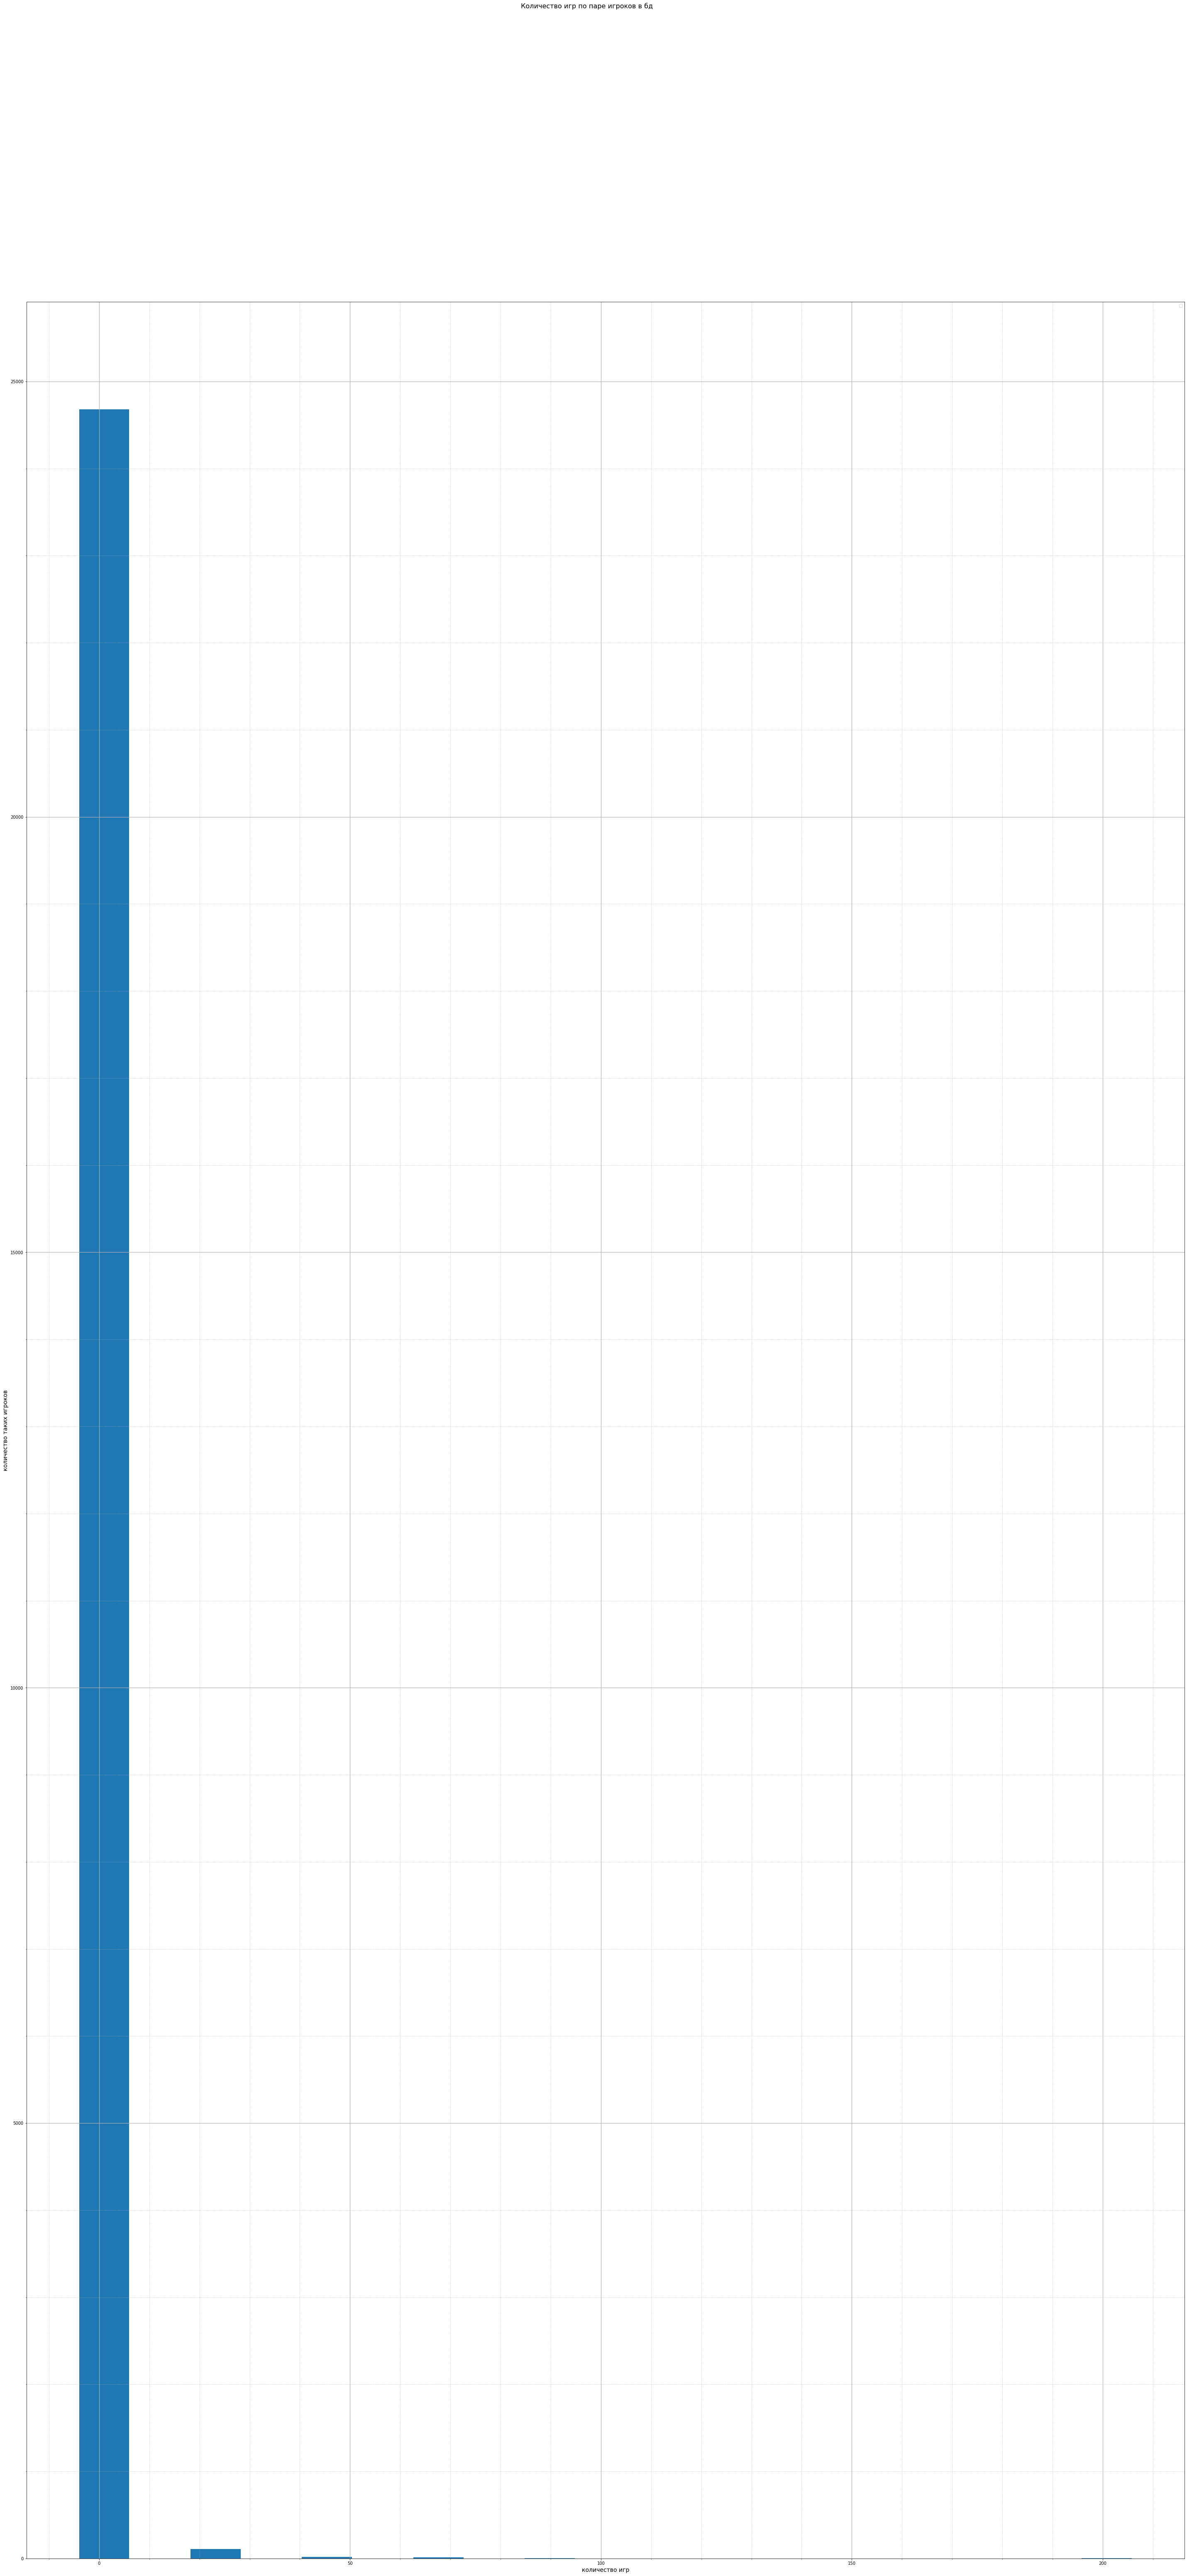

In [108]:
fig, ax = plt.subplots()
fig.set_figwidth(50)
fig.set_figheight(100)
fig.suptitle("Количество игр по паре игроков в бд", fontsize=16)
ax.set_xlabel("количество игр", fontsize=14)
ax.set_ylabel("количество таких игроков", fontsize=14)
ax.minorticks_on()
ax.grid(which="major",linewidth=1.2)
ax.grid(which="minor",linestyle = ':')

ax.bar(bin_edges[:-1],phist, width=10)
plt.show()

сделать бы поприятнее график...

# сколько повторений определенной позиции

# Матрица побед/игр на тех, у кого много игр. Пронормировать. Упорядочить.